In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
925.0, 975.0, 950.0, 6.7, 7.5, 7.0,9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


column_stack 메서드를 활용하면 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결한다.

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


np.ones(숫자) : 숫자만큼 1을 채운 배열
np.zeros(숫자) : 숫자만큼 0을 채운 배열

np.concatenate (배열1, 배열2) : 배열을 연결합니다.

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

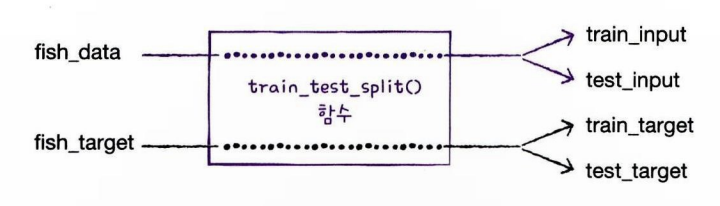

사이킷런에 있는 **train_test_split()** 함수를 사용하면 전달된 배열을 알아서 랜덤으로 섞고 나누어 준다.

In [ ]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# 수상한 도미(1) 한 마리
print(kn.predict([[25,150]]))

[0.]


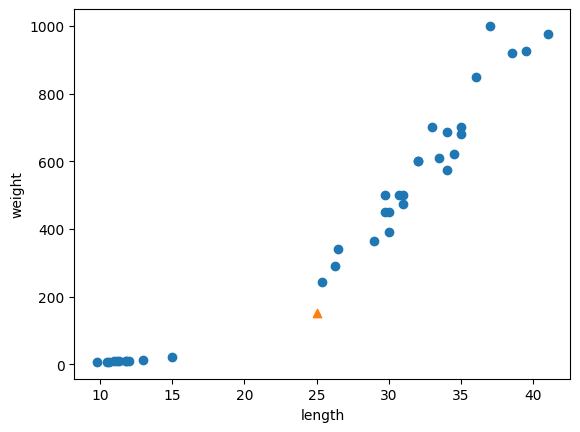

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 가장 가까운 이웃을 확인하는 메서드
distances, indexes = kn.kneighbors([[25,150]])

Text(0, 0.5, 'weight')

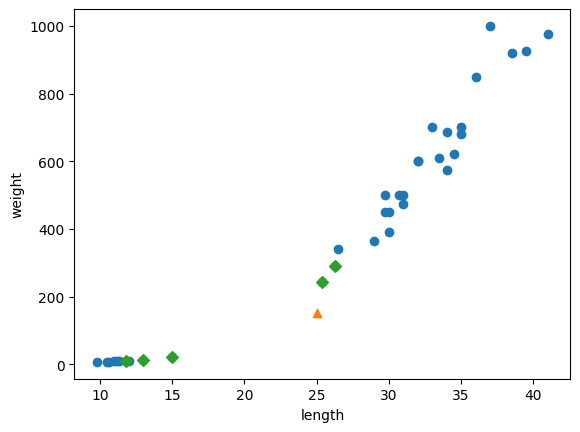

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]
[[1. 0. 0. 1. 0.]]
[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


*위 현상이 일어나는 이유는 ??*

자세히 보면 x축은 범위가 좁고(10 부터 40) y축은 범위가 넓다(0 부터 1000). 따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산된다. 따라서 이 때문에 y축에 비슷하게 분포된 값이 굉장히 멀게 계산되는 것이다.

이를 해결하기 위해서는 **x축과 y축의 범위를 동일**하게 설정해야한다.

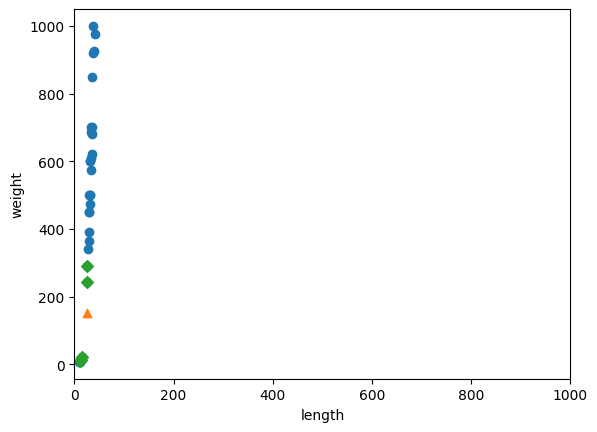

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이렇게 되면 사실상 데이터 간의 거리는 x축의 영향을 거의 받지 않고 y축의 영향을 크게 받게된다.

두 특성(길이와 무게)의 값이 놓인 범위가 매우 다른데, 이를 두 특성의 **스케일(scale)** 이 매우 다르다고도 말한다.

두 특성의 스케일이 다르면 예제처럼 원하는 결과가 나오지 않을 수도 있기에 특성값을 일정한 기준으로 맞춰야한다.

이를 **데이터 전처리**라고 한다.

가장 간단한 방법은 **표준점수**를 사용하는 것이다.
((값 - 평균) / 표준편차)

In [ ]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

train_scaled = (train_input - mean) / std

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


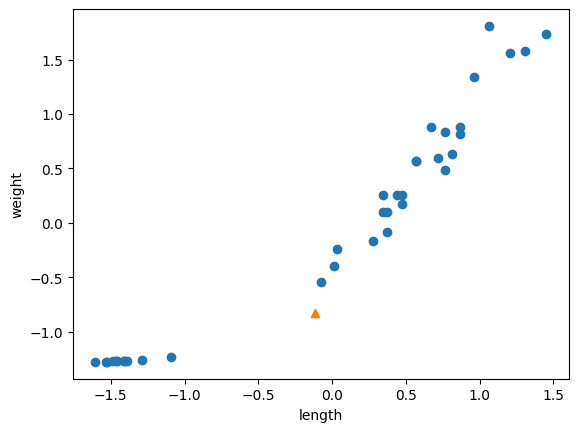

In [ ]:
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 새로운 연습 데이터셋으로 모델 훈련
kn.fit(train_scaled, train_target)
# 테스트 데이터셋 역시 평균을 빼주고 표준편차로 나누어줘야한다.
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

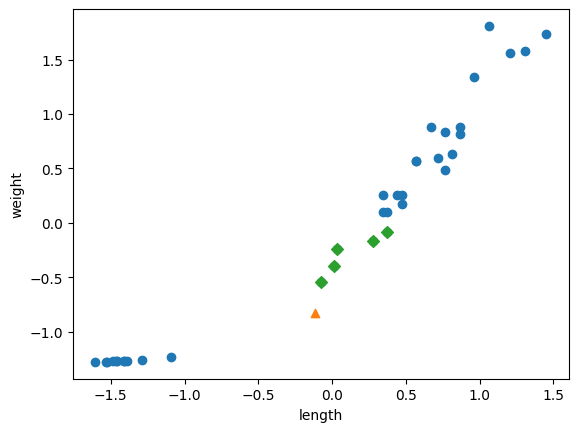

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()